In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First, we import the data

In [2]:
df = pd.read_csv('https://query.data.world/s/1jckku39d0p78m8jm1gnvww5t')

In [3]:
pd.options.display.max_columns = 60
df.head(10)

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015"
0,10 WASH,SULFACETAMIDE SODIUM,24.0,1569.19,16.0,98.074375,5170.000,0.303518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2472.0,57666.73,893.0,64.576405,293160.000,0.196766,422.0,42.347204,471.0,7.545860,3486.0,75786.01,1261.0,60.099929,405484.0,0.186918,607.0,38.242323,654.0,6.501223,4413.0,95304.09,1633.0,58.361353,522780.0,0.182282,833.0,35.618511,800.0,5.880125,6788.0,150749.66,2769.0,54.441914,813255.0,0.185352,1481.0,32.143275,1288.0,5.132989,10749.0,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0.022208
2,ABILIFY DISCMELT,ARIPIPRAZOLE,4677.0,3929705.80,961.0,4089.183975,189351.500,20.753897,83.0,439.876386,878.0,22.165581,4705.0,4529795.27,915.0,4950.595924,192615.5,23.522216,89.0,440.755955,826.0,12.490230,5033.0,5221987.76,967.0,5400.194167,193300.0,27.019006,74.0,493.977297,893.0,12.986976,5186.0,6282391.38,951.0,6606.089779,198161.0,31.703590,85.0,546.043176,866.0,10.375242,2790.0,3735192.84,742.0,5033.952615,102764.0,36.344484,53.0,663.647358,689.0,18.064644,NaN
3,AK-PENTOLATE,CYCLOPENTOLATE HCL,730.0,6893.65,563.0,12.244494,2019.000,3.414388,369.0,7.194173,194.0,1.993557,320.0,3501.42,246.0,14.233415,852.0,4.109648,175.0,8.420971,71.0,3.000423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DDAVP,DESMOPRESSIN (NONREFRIGERATED),1044.0,599877.67,194.0,3092.152938,13261.000,45.236232,75.0,372.349733,119.0,14.688319,1001.0,664332.10,193.0,3442.135233,13440.0,49.429472,77.0,457.663766,116.0,21.710345,1032.0,886774.59,202.0,4389.973218,15312.0,57.913701,91.0,483.031099,111.0,16.434775,949.0,1029916.62,163.0,6318.506871,15115.0,68.138711,77.0,643.323766,86.0,11.626163,798.0,984371.25,138.0,7133.125000,13045.0,75.459659,62.0,659.737903,76.0,11.679605,NaN
5,DDAVP,DESMOPRESSIN ACETATE,891.0,569148.45,199.0,2860.042462,76418.000,18.227627,56.0,314.423214,143.0,12.796573,1042.0,847045.55,224.0,3781.453348,84195.0,25.379099,73.0,365.493425,151.0,8.286689,868.0,848871.45,182.0,4664.128846,78186.0,25.609860,79.0,353.370380,103.0,9.195631,788.0,918910.83,169.0,5437.342189,74612.5,32.906816,82.0,365.

Recall that the year-over-year change is the ratio of the annual difference to the previous year's value, where the annual difference is the difference between the current value and the previous year's value. In other words for a series $a_t$, we compute:
$$\frac{a_t-a_{t-1}}{a_{t-l}},$$
where $t$ is the given year.

Let's compute these for various columns:

In [4]:
columns_of_interest = ['Total Spending,','Average Cost Per Unit (Weighted),','Claim Count,']
years = [2012,2013,2014,2015]
for i,column in enumerate(columns_of_interest):
    print("Computing year-over-year increase for "+column+
          " number %d of %d"%(i+1,len(columns_of_interest)))
    for year in years:
        df[column+' YOY increase '+str(year)] = (df[column+' '+str(year)]
                                                 -df[column+' '+str(year-1)])/df[column+' '+str(year-1)]

Computing year-over-year increase for Total Spending, number 1 of 3
Computing year-over-year increase for Average Cost Per Unit (Weighted), number 2 of 3
Computing year-over-year increase for Claim Count, number 3 of 3


In [5]:
df.head(10)

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013",...,"Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015","Total Spending, YOY increase 2012","Total Spending, YOY increase 2013","Total Spending, YOY increase 2014","Total Spending, YOY increase 2015","Average Cost Per Unit (Weighted), YOY increase 2012","Average Cost Per Unit (Weighted), YOY increase 2013","Average Cost Per Unit (Weighted), YOY increase 2014","Average Cost Per Unit (Weighted), YOY increase 2015","Claim Count, YOY increase 2012","Claim Count, YOY increase 2013","Claim Count, YOY increase 2014","Claim Count, YOY increase 2015"
0,10 WASH,SULFACETAMIDE SODIUM,24.0,1569.19,16.0,98.074375,5170.000,0.303518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2472.0,57666.73,893.0,64.576405,293160.000,0.196766,422.0,42.347204,471.0,7.545860,3486.0,75786.01,1261.0,60.099929,405484.0,0.186918,607.0,38.242323,654.0,6.501223,4413.0,95304.09,1633.0,58.361353,522780.0,0.182282,833.0,35.618511,...,54.441914,813255.0,0.185352,1481.0,32.143275,1288.0,5.132989,10749.0,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0.022208,0.314207,0.257542,0.581775,0.710754,-0.050047,-0.024807,0.016845,0.042368,0.410194,0.265921,0.538183,0.583530
2,ABILIFY DISCMELT,ARIPIPRAZOLE,4677.0,3929705.80,961.0,4089.183975,189351.500,20.753897,83.0,439.876386,878.0,22.165581,4705.0,4529795.27,915.0,4950.595924,192615.5,23.522216,89.0,440.755955,826.0,12.490230,5033.0,5221987.76,967.0,5400.194167,193300.0,27.019006,74.0,493.977297,...,6606.089779,198161.0,31.703590,85.0,546.043176,866.0,10.375242,2790.0,3735192.84,742.0,5033.952615,102764.0,36.344484,53.0,663.647358,689.0,18.064644,NaN,0.152706,0.152809,0.203065,-0.405450,0.133388,0.148659,0.173381,0.146384,0.005987,0.069713,0.030399,-0.462013
3,AK-PENTOLATE,CYCLOPENTOLATE HCL,730.0,6893.65,563.0,12.244494,2019.000,3.414388,369.0,7.194173,194.0,1.993557,320.0,3501.42,246.0,14.233415,852.0,4.109648,175.0,8.420971,71.0,3.000423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.492080,NaN,NaN,NaN,0.203626,NaN,NaN,NaN,-0.561644,NaN,NaN,NaN
4,DDAVP,DESMOPRESSIN (NONREFRIGERATED),1044.0,599877.67,194.0,3092.152938,13261.000,45.236232,75.0,372.349733,119.0,14.688319,1001.0,664332.10,193.0,3442.135233,13440.0,49.429472,77.0,457.663766,116.0,21.710345,1032.0,886774.5

Let's sort by the largest YOY spending increase in 2012, and explore the results:

In [6]:
year = 2012
column = columns_of_interest[0]
df_sorted = df.sort_values(by=column+' YOY increase '+str(year),ascending=False)

Let's take a look at the top 10 and bottom 5 changes in YOY spending

In [7]:
num_top = 10
num_bot = 5
df_tmp = df_sorted.dropna(subset=[column+' YOY increase '+str(year) for year in years])
df_tmp = pd.concat([df_tmp.iloc[:num_top],df_tmp.iloc[-num_bot:]])

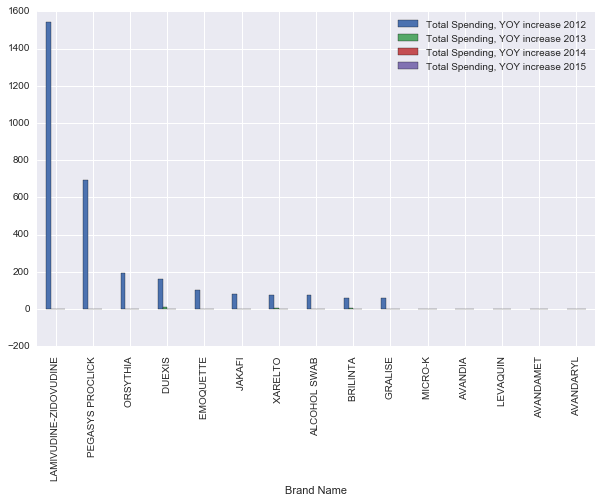

In [8]:
df_tmp[['Brand Name']+
        [column+' YOY increase '+str(yr) for yr in years]].plot.bar(x = 'Brand Name',
                                                                           figsize = (10,6))

There seems to be a lot of variation in terms of YOY spending increase... So let's add new column for the max of the absolute values of the YOY spending throughout all years:

In [9]:
for column in columns_of_interest:
    df[column+'YOY Max'] = np.abs(df[[column+' YOY increase '
                                             +str(yr) for yr in years]]).max(axis=1)

Let's sort and visualize the `num_top` results:

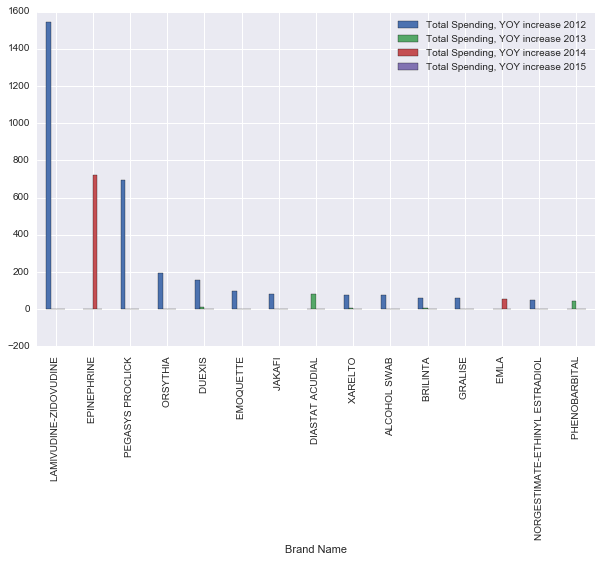

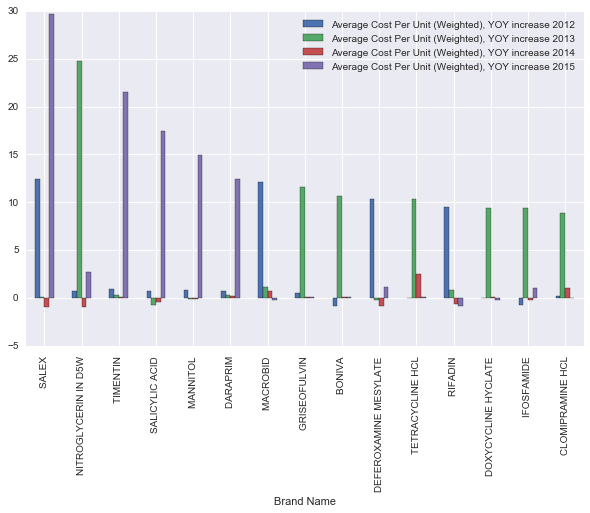

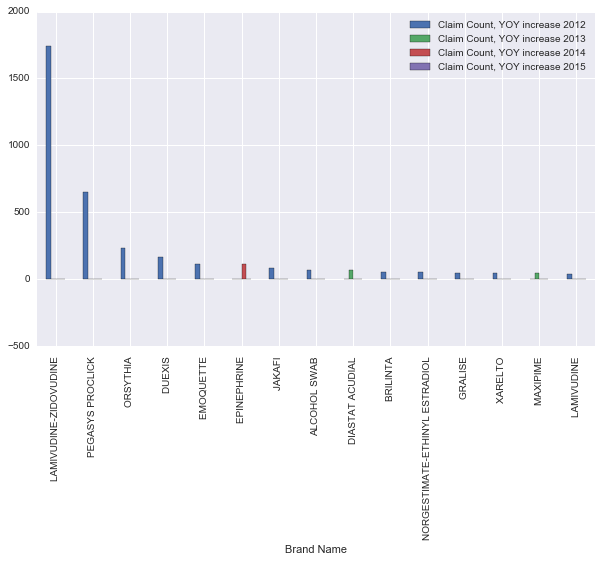

In [10]:
num_top = 15
for column in columns_of_interest:
    df_sorted = df.sort_values(by=column+'YOY Max',ascending=False)
    df_tmp = df_sorted.dropna(subset=[column+' YOY increase '
                                      +str(year) for year in years]).iloc[:num_top]

    df_tmp[['Brand Name']+
            [column+' YOY increase '
             +str(yr) for yr in years]].plot.bar(x = 'Brand Name',
                                                 figsize = (10,6))
    plt.show()